# Aula 10 - Detecção de Borda

1 - Implemente o método de detecção de normais apresentado acima.

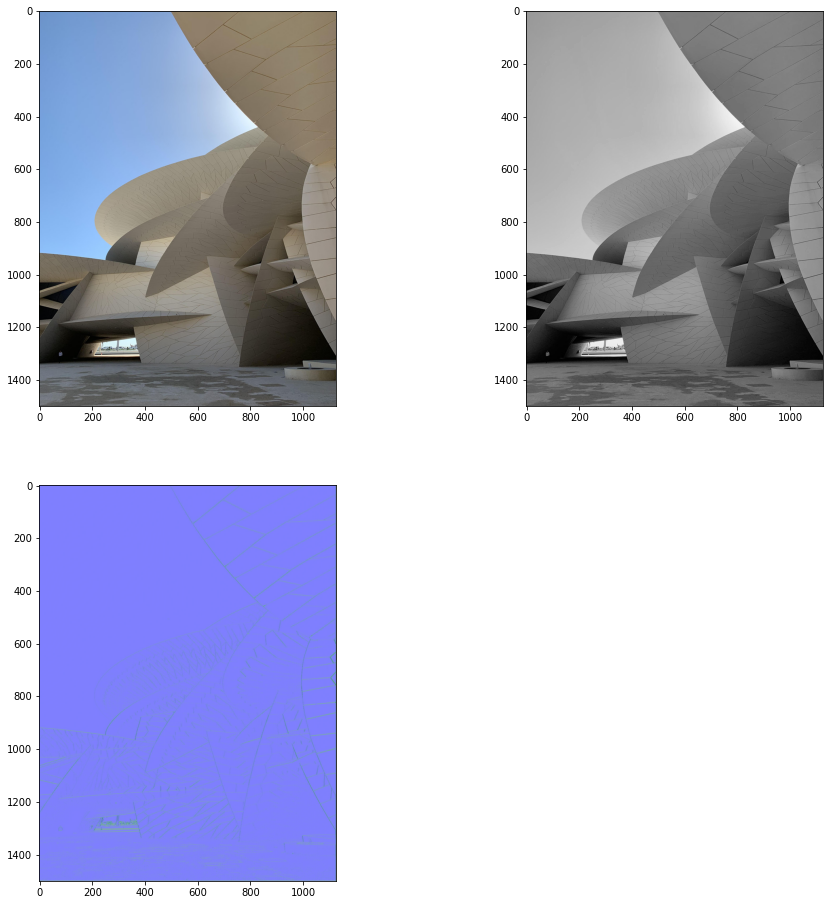

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

museum_rgb = np.array(Image.open("museum.jpg"))[:,:,:3]

def grayscale(museum_rgb):
    l, c, p = museum_rgb.shape
    # converter para escala de cinza:
    museum = np.zeros(shape=(l, c), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(museum_rgb[i, j, 0])
            g = float(museum_rgb[i, j, 1])
            b = float(museum_rgb[i, j, 2])

            museum[i, j] = (r + g + b) / 3
            
    return museum

def normais(img):
    (l, c) = img.shape
    img_normais = np.zeros(shape=(l, c, 3), dtype=np.uint8)
    
    abs_tg_c = np.abs(np.diff(img, axis=1, append=255))
    abs_tg_l = np.abs(np.diff(img, axis=0, append=255))
    abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)
    
    img_normais[:,:,0] = (-(abs_tg_c) + 255)/2
    img_normais[:,:,1] = (abs_tg_l+ 255)/2
    img_normais[:,:,2] = 255 - abs_tg
    
    return img_normais        

museum = grayscale(museum_rgb)
img_normais = normais(museum)

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(museum_rgb)
plt.subplot(2, 2, 2)
plt.imshow(museum, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(img_normais)

2 - Escolha algum dos métodos de detecção de borda com convolução acima (exceto Roberts cross) e utilize-o em uma imagem de sua escolha.

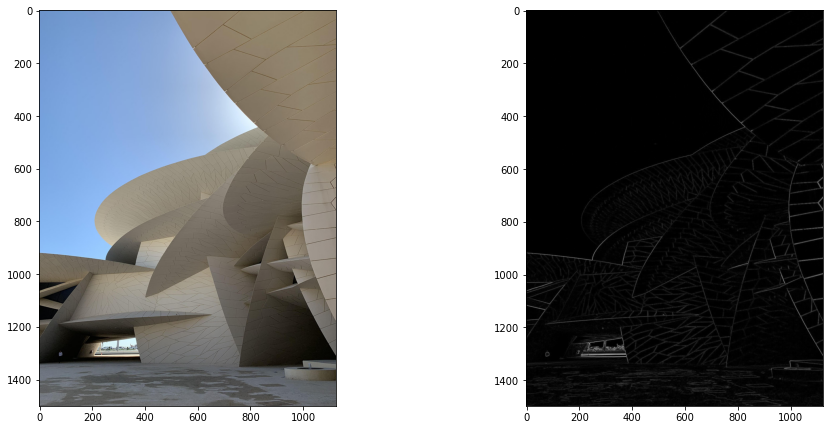

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

museum_rgb = np.array(Image.open("museum.jpg"))[:, :, :3]

def grayscale(museum):
    l, c, p = museum_rgb.shape
    museum = np.zeros(shape=(l, c), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(museum_rgb[i, j, 0])
            g = float(museum_rgb[i, j, 1])
            b = float(museum_rgb[i, j, 2])

            museum[i, j] = (r + g + b) / 3
    return museum

def conv(image, kernel):
    m, n = kernel.shape
    # assert verifica se uma condição é verdadeira
    # e mostra uma mensagem de erro caso falhe:
    assert m == n, "Kernel deve ser uma matriz quadrada."
    l, c = image.shape
    
    # novas dimensões da imagem (imagem menos o tamanho do filtro):
    new_l = l - m + 1
    new_c = c - n + 1
    new_image = np.zeros(shape=(new_l, new_c))
    for i in range(new_l):
        for j in range(new_c):
            # soma da multiplicação ponto-a-ponto entre o kernel e a
            # imagem (recorte do trecho da imagem do mesmo tamanho do kernel):
            new_image[i, j] = np.sum(image[i:i + n, j:j + m] * kernel)
    
    return new_image

def prewitt(img):
    kernel_x = np.array([[1, 0,-1], [1, 0, -1], [1, 0, -1]], dtype=np.float64)
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1] ], dtype=np.float64)
    
    conv_x = conv(img, kernel_x)
    conv_y = conv(img, kernel_y)
    
    # np.hypot(x, y) é o mesmo que np.sqrt((x ** 2) + (y ** 2))
    gradient = np.hypot(conv_x, conv_y)
    
    return gradient

plt.figure(figsize=(16, 16))
#Precisa normalizar a imagem
museum = grayscale(museum_rgb)
plt.subplot(2, 2, 1)
plt.imshow(museum_rgb)
plt.subplot(2, 2, 2)
plt.imshow(prewitt(museum / 255), cmap='gray')